# movie binary classification

In [1]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

/usr/local/lib/python3.6/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
type(train_data)

numpy.ndarray

In [3]:
train_data.shape

(25000,)

In [4]:
train_data[0][:10]

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65]

In [5]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [6]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [7]:
type(word_index)

dict

In [8]:
len(word_index)

88584

In [9]:
import numpy as np

def vectorize_sequences(sequences, dim=10000):
    result = np.zeros((len(sequences), dim))
    for i, seq in enumerate(sequences):
        result[i, seq] = 1
    return result

    x_train = vectorize_sequences(train_data)
    x_test = vectorize_sequences(test_data)

In [10]:
y_train = np.asarray(train_labels, dtype=np.float32)
y_test = np.asarray(test_labels, dtype=np.float32)

In [11]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(10000,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [12]:
from keras import optimizers
from keras import losses
from keras import metrics

In [13]:
model.compile(optimizer=optimizers.Adam(), loss=losses.binary_crossentropy, metrics=[metrics.binary_accuracy])

In [14]:
history = model.fit(x=x_train, y=y_train, batch_size=512, epochs=20, validation_split=0.3)

Train on 17500 samples, validate on 7500 samples
Epoch 1/20
17500/17500 [==============================] - 1s 67us/step - loss: 0.5389 - binary_accuracy: 0.7803 - val_loss: 0.3728 - val_binary_accuracy: 0.8660
Epoch 2/20
17500/17500 [==============================] - 1s 56us/step - loss: 0.2783 - binary_accuracy: 0.9046 - val_loss: 0.2783 - val_binary_accuracy: 0.8904
Epoch 3/20
17500/17500 [==============================] - 1s 56us/step - loss: 0.1894 - binary_accuracy: 0.9339 - val_loss: 0.2744 - val_binary_accuracy: 0.8891
Epoch 4/20
17500/17500 [==============================] - 1s 56us/step - loss: 0.1434 - binary_accuracy: 0.9552 - val_loss: 0.2840 - val_binary_accuracy: 0.8857
Epoch 5/20
17500/17500 [==============================] - 1s 56us/step - loss: 0.1125 - binary_accuracy: 0.9659 - val_loss: 0.3082 - val_binary_accuracy: 0.8845
Epoch 6/20
17500/17500 [==============================] - 1s 56us/step - loss: 0.0870 - binary_accuracy: 0.9756 - val_loss: 0.3333 - val_binary_ac

In [15]:
history.history.keys()

dict_keys(['val_loss', 'val_binary_accuracy', 'loss', 'binary_accuracy'])

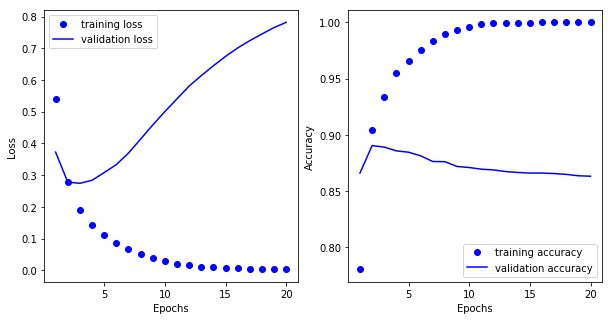

In [27]:
import matplotlib.pyplot as plt 

history_dict = history.history
epochs = range(1, len(history_dict['loss'])+1)

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,5))

ax1.plot(epochs, history_dict['loss'], 'bo', label='training loss')
ax1.plot(epochs, history_dict['val_loss'], 'b', label='validation loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()

ax2.plot(epochs, history_dict['binary_accuracy'], 'bo', label='training accuracy')
ax2.plot(epochs, history_dict['val_binary_accuracy'], 'b', label='validation accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend()


plt.show()

In [31]:
model2 = Sequential()
model2.add(Dense(64, activation='relu', input_shape=(10000,)))
model2.add(Dense(32, activation='relu'))
model2.add(Dense(16, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))

model2.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
model2.fit(x_train, y_train, epochs=10, batch_size=256, validation_split=0.3)

Train on 17500 samples, validate on 7500 samples
Epoch 1/10
17500/17500 [==============================] - 2s 123us/step - loss: 0.3864 - acc: 0.8386 - val_loss: 0.2792 - val_acc: 0.8912
Epoch 2/10
17500/17500 [==============================] - 2s 101us/step - loss: 0.1802 - acc: 0.9344 - val_loss: 0.3038 - val_acc: 0.8865
Epoch 3/10
17500/17500 [==============================] - 2s 108us/step - loss: 0.1127 - acc: 0.9623 - val_loss: 0.3574 - val_acc: 0.8816
Epoch 4/10
17500/17500 [==============================] - 2s 102us/step - loss: 0.0709 - acc: 0.9770 - val_loss: 0.4467 - val_acc: 0.8739
Epoch 5/10
17500/17500 [==============================] - 2s 108us/step - loss: 0.0431 - acc: 0.9873 - val_loss: 0.5287 - val_acc: 0.8699
Epoch 6/10
17500/17500 [==============================] - 2s 102us/step - loss: 0.0252 - acc: 0.9934 - val_loss: 0.6196 - val_acc: 0.8711
Epoch 7/10
17500/17500 [==============================] - 2s 108us/step - loss: 0.0112 - acc: 0.9980 - val_loss: 0.7220 - v

In [32]:
model2.evaluate(x_test, y_test)

25000/25000 [==============================] - 2s 74us/step


[0.9444229762992263, 0.85008]

# news multiclass classification

In [34]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2113536/2110848 [==============================] - 2s 1us/step


In [35]:
print(len(train_data),len(test_data))

8982 2246


In [36]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

557056/550378 [==============================] - 1s 2us/step


In [37]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [38]:
from keras.utils.np_utils import to_categorical

In [39]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [65]:
model_reuters = Sequential()
model_reuters.add(Dense(128, activation='relu', input_shape=(10000,)))
#model_reuters.add(Dense(32, activation='relu'))
model_reuters.add(Dense(46, activation='softmax'))

In [66]:
model_reuters.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

In [67]:
history_reuters = model_reuters.fit(x_train, y_train, batch_size=512, epochs=20, validation_split=0.1)

Train on 8083 samples, validate on 899 samples
Epoch 1/20
8083/8083 [==============================] - 1s 139us/step - loss: 2.7938 - acc: 0.5022 - val_loss: 1.9868 - val_acc: 0.6218
Epoch 2/20
8083/8083 [==============================] - 1s 104us/step - loss: 1.4627 - acc: 0.7063 - val_loss: 1.4330 - val_acc: 0.7097
Epoch 3/20
8083/8083 [==============================] - 1s 103us/step - loss: 0.9806 - acc: 0.8008 - val_loss: 1.1873 - val_acc: 0.7519
Epoch 4/20
8083/8083 [==============================] - 1s 103us/step - loss: 0.7205 - acc: 0.8590 - val_loss: 1.0639 - val_acc: 0.7831
Epoch 5/20
8083/8083 [==============================] - 1s 103us/step - loss: 0.5415 - acc: 0.8961 - val_loss: 0.9930 - val_acc: 0.7864
Epoch 6/20
8083/8083 [==============================] - 1s 103us/step - loss: 0.4210 - acc: 0.9191 - val_loss: 0.9484 - val_acc: 0.7953
Epoch 7/20
8083/8083 [==============================] - 1s 104us/step - loss: 0.3351 - acc: 0.9321 - val_loss: 0.9283 - val_acc: 0.8020
E

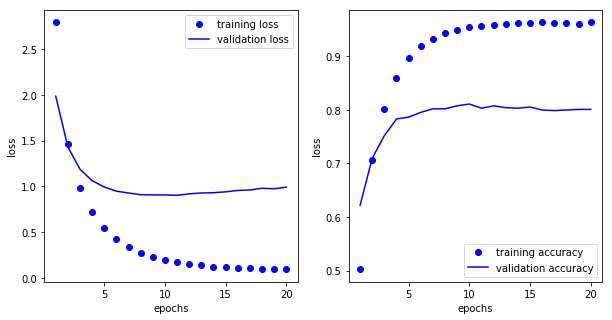

In [68]:
history_dict = history_reuters.history

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,5))

ax1.plot(epochs, history_dict['loss'], 'bo', label = "training loss")
ax1.plot(epochs, history_dict['val_loss'], 'b', label = "validation loss")
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

ax2.plot(epochs, history_dict['acc'], 'bo', label = "training accuracy")
ax2.plot(epochs, history_dict['val_acc'], 'b', label = "validation accuracy")
ax2.set_xlabel('epochs')
ax2.set_ylabel('loss')
ax2.legend()

plt.show()


In [69]:
model_reuters.evaluate(x_test, y_test)

2246/2246 [==============================] - 0s 112us/step


[0.9546326777814014, 0.8018699910952805]

In [53]:
pred = model_reuters.predict(x_test)

In [55]:
print(np.sum(pred[0]))
print(np.argmax(pred[0]))
print(np.max(pred[0]))

1.0000002
3
0.9701007


In [70]:
from keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

57344/57026 [==============================] - 0s 5us/step


In [71]:
train_data.shape

(404, 13)

In [72]:
test_data.shape

(102, 13)

In [74]:
mean = train_data.mean(axis=0)
std = train_data.std(axis=0)

train_data_norm = (train_data - mean)/std
test_data_norm = (test_data - mean)/std

In [90]:
def build_model(input, output, layers = [64,64], activation='relu'):
    
    input_layer, input_dim = input
    
    model = Sequential()
    model.add(Dense(input_layer, activation=activation, input_shape=(input_dim,)))
    for l in layers:
        model.add(Dense(l, activation=activation))
    model.add(Dense(output))
    
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    
    return model

In [126]:
k = 4
num_val_smaples = len(train_data_norm)//k
perf_history=[]

idx = np.random.permutation(range(train_data_norm.shape[0]))

for i in range(k):
    val = idx[i*num_val_smaples:(i+1)*num_val_smaples]
    #y_val = train_targets[k*num_val_smaples:(k+1)*num_val_smaples]
    
    train = np.concatenate((idx[:i*num_val_smaples], idx[(i+1)*num_val_smaples:]))
    #y_temp = np.vstack((train_targets[:k*num_val_smaples], train_targets[(k+1)*num_val_smaples:]))
    
    model_news = build_model(input = (64, len(train_data_norm[0])), output=1)
    history = model_news.fit(
        x=train_data_norm[train], y=train_targets[train], 
        validation_data=(train_data_norm[val], train_targets[val]),
        epochs = 100, 
        batch_size=1,
        verbose=0)
    perf_history.append(history.history)

In [127]:
len(perf_history)

4

In [128]:
perf_history[0].keys()

dict_keys(['val_loss', 'val_mean_absolute_error', 'loss', 'mean_absolute_error'])

In [129]:
mae_hist = np.zeros((4,500))

for idx, hist in enumerate(perf_history):
    mae_hist[idx]=hist['mean_absolute_error']

avg_mae_hist = mae_hist.mean(axis=0)

ValueError: cannot copy sequence with size 100 to array axis with dimension 500

In [ ]:
mae_hist[:,:5]

In [ ]:
avg_mae_hist[:5]

In [ ]:
plt.plot(range(1, len(avg_mae_hist) + 1), avg_mae_hist)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [ ]:
mae_val_hist = np.zeros((4,500))

for idx, hist in enumerate(perf_history):
    mae_val_hist[idx]=hist['val_mean_absolute_error']

avg_mae_val_hist = mae_val_hist.mean(axis=0)

plt.plot(range(1, len(avg_mae_val_hist) + 1), avg_mae_val_hist)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [ ]:
def smoothing(data, factor=0.9):
    smoothed_result = [data[0]]
    
    for p in data[1:]:
        prev = smoothed_result[-1]
        smoothed_result.append(factor*prev + (1-factor)*p)
    return smoothed_result

In [ ]:
smoothed_avg_mae = smoothing(avg_mae_val_hist[5:])

plt.plot(range(1, len(smoothed_avg_mae) + 1), smoothed_avg_mae)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [ ]:
model.evaluate(test_data_norm, test_targets)